In [1]:
# Import library
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [2]:
# Read in CSV file
csv_path = Path("../Data/house_prices_msa.csv")
house_price_raw = pd.read_csv(csv_path)
# index_col="RegionName"
# house_price_raw.drop(["RegionType"], axis = 1, inplace = True) 
# split the RegionName into City and State columns
house_price_raw[['City','State']] = house_price_raw.RegionName.str.split(",",expand=True)
# Reorder the state and city col to the first two col
city_col_name="City"
state_col_name="State"
region_col_name="RegionName"
first_col = house_price_raw.pop(city_col_name)
second_col = house_price_raw.pop(state_col_name)
third_col = house_price_raw.pop(region_col_name)
house_price_raw.insert(0, city_col_name, first_col)
house_price_raw.insert(1, state_col_name, second_col)
house_price_raw.insert(2, region_col_name, third_col)
# Set index as RegionName
house_price_raw_indexed = house_price_raw.set_index("RegionName")
house_price_raw_indexed.drop(["RegionType","StateName","City","RegionID","State","SizeRank"], axis = 1, inplace = True) 
# Clean and filter columns
house_price_df = house_price_raw_indexed.transpose() 
# Remove Index name from table
house_price_df.columns.name = None
house_price_df

,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Winnemucca, NV","Sweetwater, TX","Andrews, TX","Zapata, TX","Vermillion, SD","Lamesa, TX","Craig, CO","Pecos, TX","Vernon, TX","Ketchikan, AK"
1/31/1996,107630.0,187842.0,183929.0,164647.0,114406.0,121233.0,110773.0,178034.0,109403.0,120291.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60501.0,NaN,NaN,NaN
2/29/1996,107657.0,187403.0,184185.0,164345.0,114471.0,121078.0,110849.0,177811.0,109533.0,120519.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60725.0,NaN,NaN,NaN
3/31/1996,107707.0,187125.0,184205.0,163946.0,114634.0,120937.0,110858.0,177681.0,109670.0,120740.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60961.0,NaN,NaN,NaN
4/30/1996,107834.0,186592.0,184312.0,163493.0,114962.0,120693.0,111007.0,177407.0,109917.0,121229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61420.0,NaN,NaN,NaN
5/31/1996,107977.0,186274.0,184286.0,162886.0,115314.0,120527.0,111148.0,177288.0,110132.0,121711.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61747.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/31/2020,253216.0,485517.0,691229.0,247719.0,264699.0,256799.0,224420.0,441727.0,302132.0,245768.0,...,226697.0,79991.0,170737.0,91481.0,179138.0,76213.0,187109.0,129605.0,69276.0,312216.0
6/30/2020,254423.0,487279.0,692332.0,248421.0,265992.0,258666.0,225165.0,444179.0,303396.0,247242.0,...,227020.0,80081.0,171393.0,91978.0,179052.0,76503.0,187262.0,130574.0,69229.0,312121.0
7/31/2020,255872.0,489670.0,696613.0,249650.0,267485.0,260637.0,226007.0,447399.0,304694.0,248841.0,...,227333.0,80159.0,172116.0,92335.0,178945.0,76738.0,187332.0,131262.0,69236.0,312147.0
8/31/2020,257736.0,492875.0,703740.0,251298.0,269183.0,263126.0,227049.0,451030.0,306533.0,250642.0,...,227223.0,80068.0,172764.0,92363.0,179167.0,76975.0,187393.0,131311.0,69248.0,312419.0


In [3]:
# Pull the top 5 region names by average housing price
top_5_region = house_price_df.mean().nlargest(5)
house_price_df
top_5_region.round(2)

San Jose, CA          652517.55
San Francisco, CA     636105.81
Vineyard Haven, MA    571141.74
Santa Cruz, CA        564395.91
Key West, FL          559014.42
dtype: float64

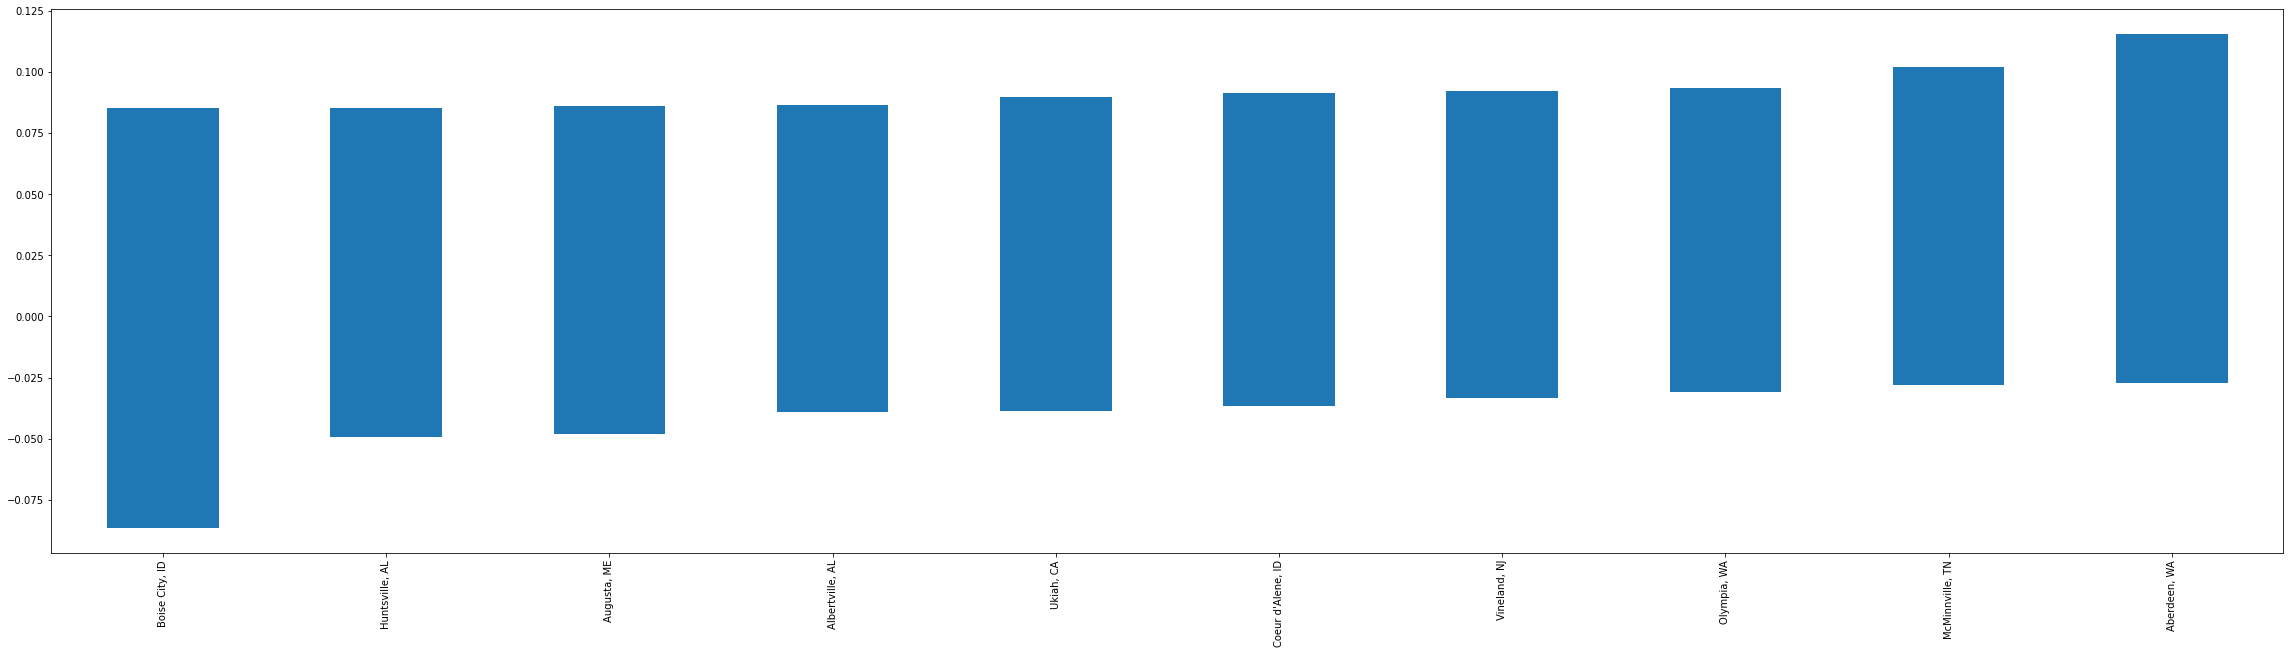

In [4]:
# Coronavirus impact
(house_price_df.loc['9/30/2020']/house_price_df.loc['2/29/2020']-1).sort_values().head(10).plot(kind='bar',figsize=(40,10))
(house_price_df.loc['9/30/2020']/house_price_df.loc['2/29/2020']-1).sort_values().tail(10).plot(kind='bar',figsize=(40,10))

In [5]:
# Import second file
# Read in CSV file
csv_path_2 = Path("../Data/rental_prices_msa.csv")
rental_price_raw = pd.read_csv(csv_path_2)

In [6]:
# split the RegionName into City and State columns
rental_price_raw[['City','State']] = rental_price_raw.RegionName.str.split(",",expand=True)
# Reorder the state and city col to the first two col
city_col_name="City"
state_col_name="State"
region_col_name="RegionName"
first_col = rental_price_raw.pop(city_col_name)
second_col = rental_price_raw.pop(state_col_name)
third_col = rental_price_raw.pop(region_col_name)
rental_price_raw.insert(0, city_col_name, first_col)
rental_price_raw.insert(1, state_col_name, second_col)
rental_price_raw.insert(2, region_col_name, third_col)
# Set index as City
rental_price_raw_indexed = rental_price_raw.set_index("City")
# Drop none float columns for analysis
rental_price_raw_indexed.drop(["State","RegionName","RegionID","SizeRank"], axis = 1, inplace = True) 
# Transpose columns
rental_price_df = rental_price_raw_indexed.transpose() 
rental_price_df

City,United States,New York,Los Angeles-Long Beach-Anaheim,Chicago,Dallas-Fort Worth,Philadelphia,Houston,Washington,Miami-Fort Lauderdale,Atlanta,...,Melbourne,Chattanooga,Spokane,Provo,Durham,Port St. Lucie,Fort Collins,Boulder,Greeley,Gainesville
2014-01,1354.0,2296.0,1857.0,1527.0,1222.0,1364.0,1272.0,1893.0,1571.0,1139.0,...,986.0,914.0,857.0,991.0,1173.0,1157.0,1239.0,1522.0,1252.0,978.0
2014-02,1360.0,2307.0,1870.0,1532.0,1228.0,1367.0,1282.0,1897.0,1578.0,1144.0,...,991.0,NaN,858.0,997.0,1175.0,1165.0,1252.0,1534.0,1262.0,981.0
2014-03,1366.0,2318.0,1884.0,1537.0,1234.0,1369.0,1292.0,1901.0,1586.0,1148.0,...,997.0,NaN,859.0,1004.0,1177.0,1173.0,1265.0,1547.0,1272.0,984.0
2014-04,1372.0,2329.0,1897.0,1542.0,1240.0,1372.0,1302.0,1905.0,1594.0,1152.0,...,1003.0,938.0,860.0,1010.0,1178.0,1181.0,1278.0,1560.0,1282.0,987.0
2014-05,1378.0,2339.0,1910.0,1546.0,1245.0,1374.0,1311.0,1909.0,1602.0,1157.0,...,1008.0,945.0,861.0,1016.0,1180.0,1189.0,1291.0,1572.0,1292.0,991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05,1707.0,2662.0,2546.0,1775.0,1567.0,1608.0,1485.0,2117.0,1936.0,1568.0,...,1486.0,1224.0,1203.0,1326.0,1434.0,1679.0,1649.0,1997.0,1693.0,1413.0
2020-06,1709.0,2653.0,2546.0,1774.0,1568.0,1610.0,1485.0,2115.0,1938.0,1572.0,...,1492.0,1229.0,1210.0,1328.0,1434.0,1687.0,1651.0,1998.0,1695.0,1417.0
2020-07,1710.0,2644.0,2546.0,1772.0,1570.0,1612.0,1484.0,2113.0,1940.0,1576.0,...,1498.0,1234.0,1216.0,1330.0,1434.0,1695.0,1653.0,1998.0,1698.0,1420.0
2020-08,1711.0,2635.0,2545.0,1771.0,1571.0,1614.0,1484.0,2111.0,1942.0,1580.0,...,1504.0,1239.0,1223.0,1332.0,1435.0,1702.0,1656.0,1999.0,1700.0,1423.0


In [7]:
# Pull the top 5 region names by average housing price
top_5_region_rental = rental_price_df.mean().nlargest(5)
top_5_region_rental.round(2)

City
San Francisco    2904.70
San Jose         2837.48
New York         2554.11
Ventura          2397.10
Boston           2364.98
dtype: float64

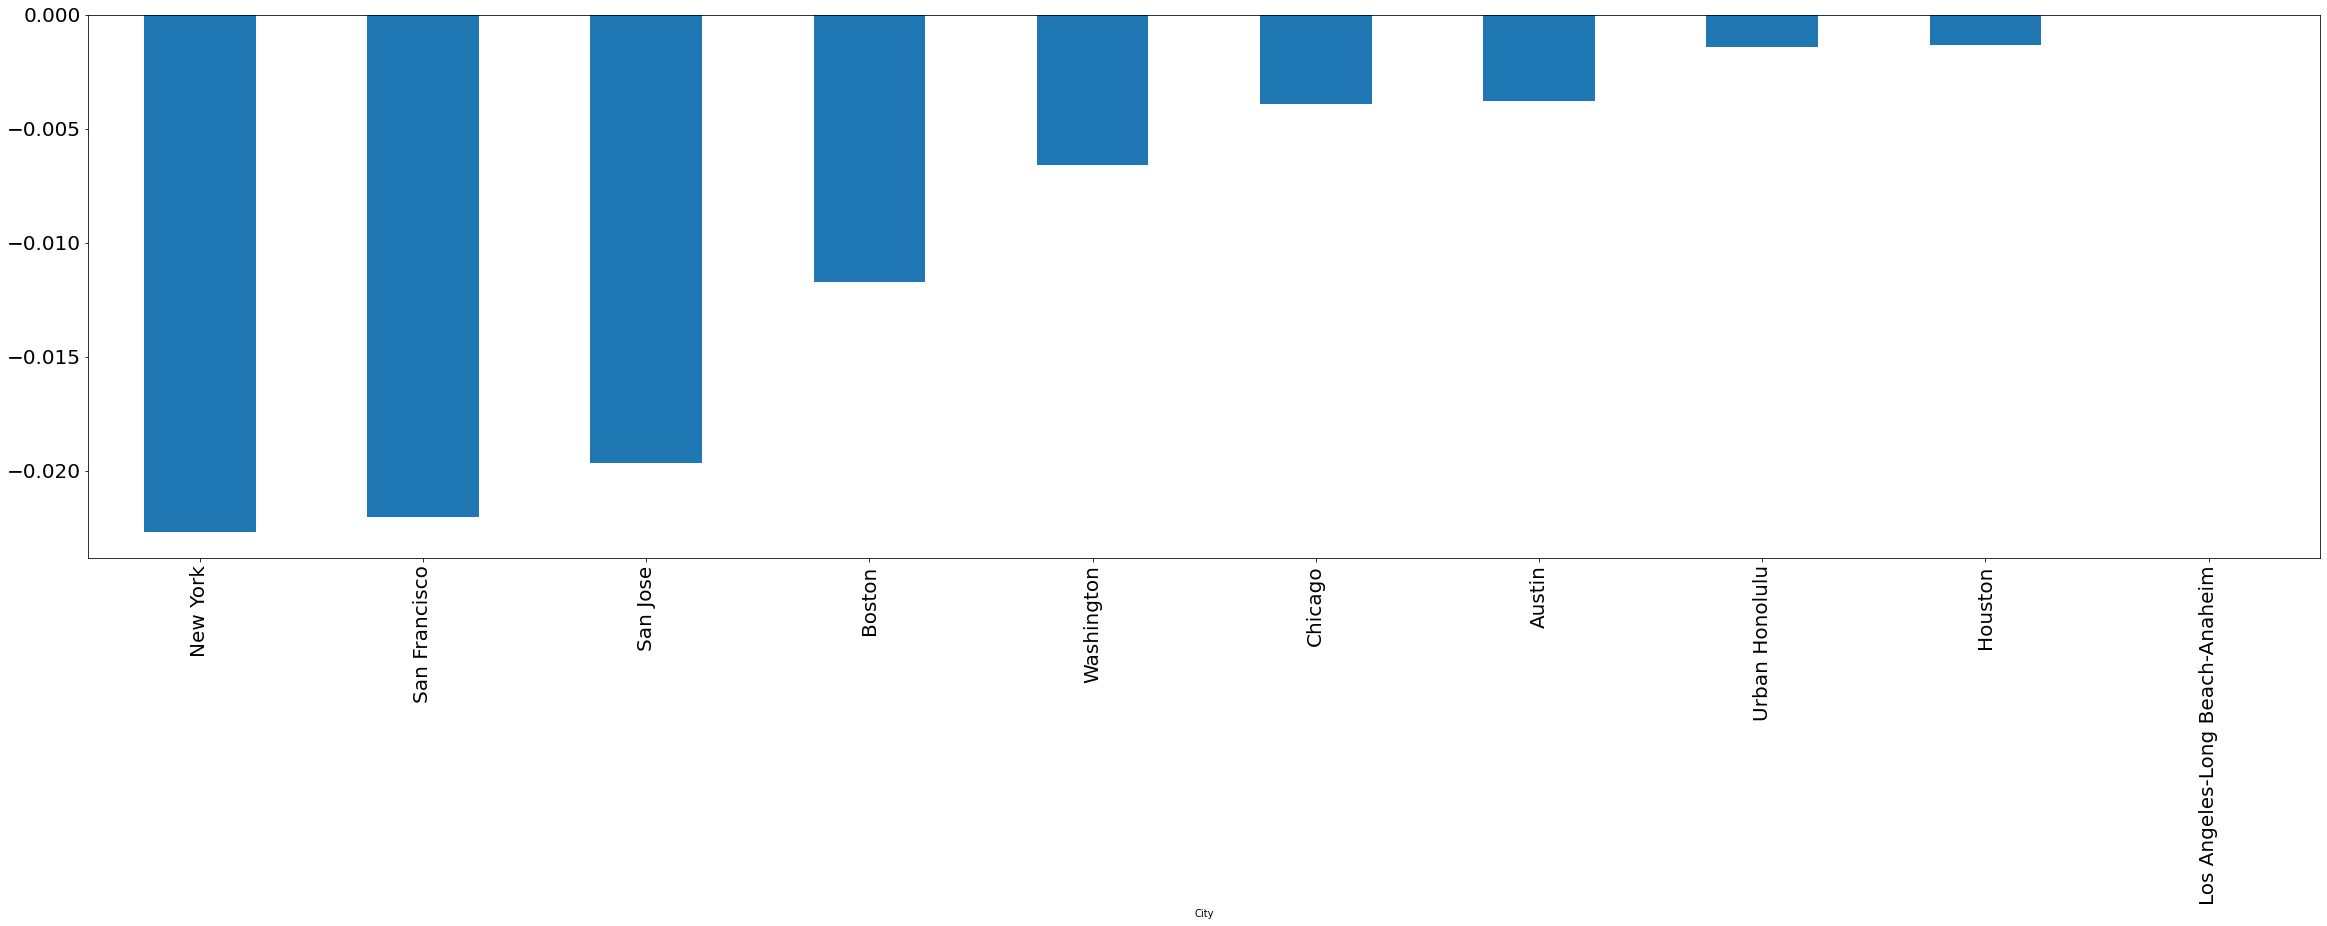

In [8]:
# Coronavirus impact Top Inc
(rental_price_df.loc['2020-09']/rental_price_df.loc['2020-02']-1).sort_values().head(10).plot(kind='bar',figsize=(40,10),fontsize=(20))

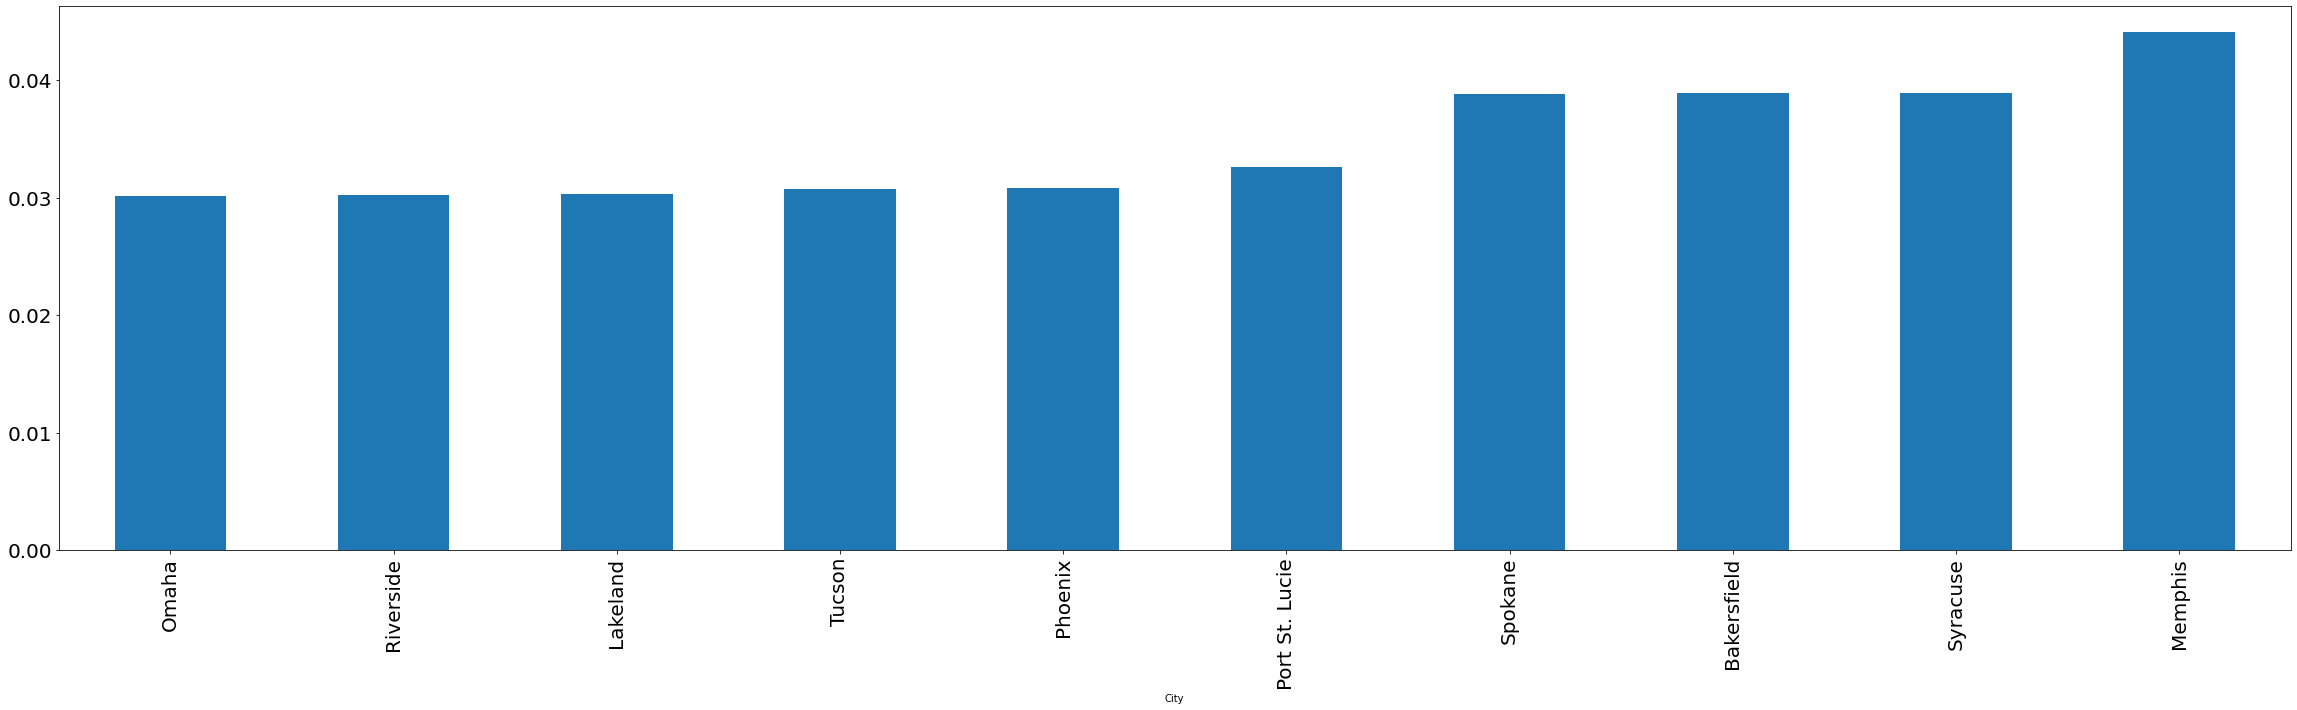

In [9]:
# Coronavirus impact Top Dec
(rental_price_df.loc['2020-09']/rental_price_df.loc['2020-02']-1).sort_values().tail(10).plot(kind='bar',figsize=(40,10),fontsize=(20))

In [19]:
# YTD change 12/31/19 to 9/30/20
ytd_start_date="2019-12"
ytd_end_date="2020-09"

change_since_dec = rental_price_df.loc[start_date]/rental_price_df.loc[end_date]-1
change_since_dec

yoy_start_date="2019-09"
yoy_end_date="2020-09"

yoy_change_rental = rental_price_df.loc[yoy_start_date]/rental_price_df.loc[yoy_end_date]-1
yoy_change_rental

corona_impact_df = pd.DataFrame(change_since_dec,columns=["% Change since 12/2019"])
corona_impact_df["YOY change September 19-20"]=yoy_change_rental

In [20]:
corona_impact_df.head(106)

,% Change since 12/2019,YOY change September 19-20
City,,
United States,-0.008178,-0.014019
New York,0.027810,0.028190
Los Angeles-Long Beach-Anaheim,-0.001179,-0.004715
Chicago,0.004520,0.001695
Dallas-Fort Worth,-0.007634,-0.012087
...,...,...
Port St. Lucie,-0.040936,-0.054386
Fort Collins,-0.013269,-0.018094
Boulder,-0.004500,-0.008500


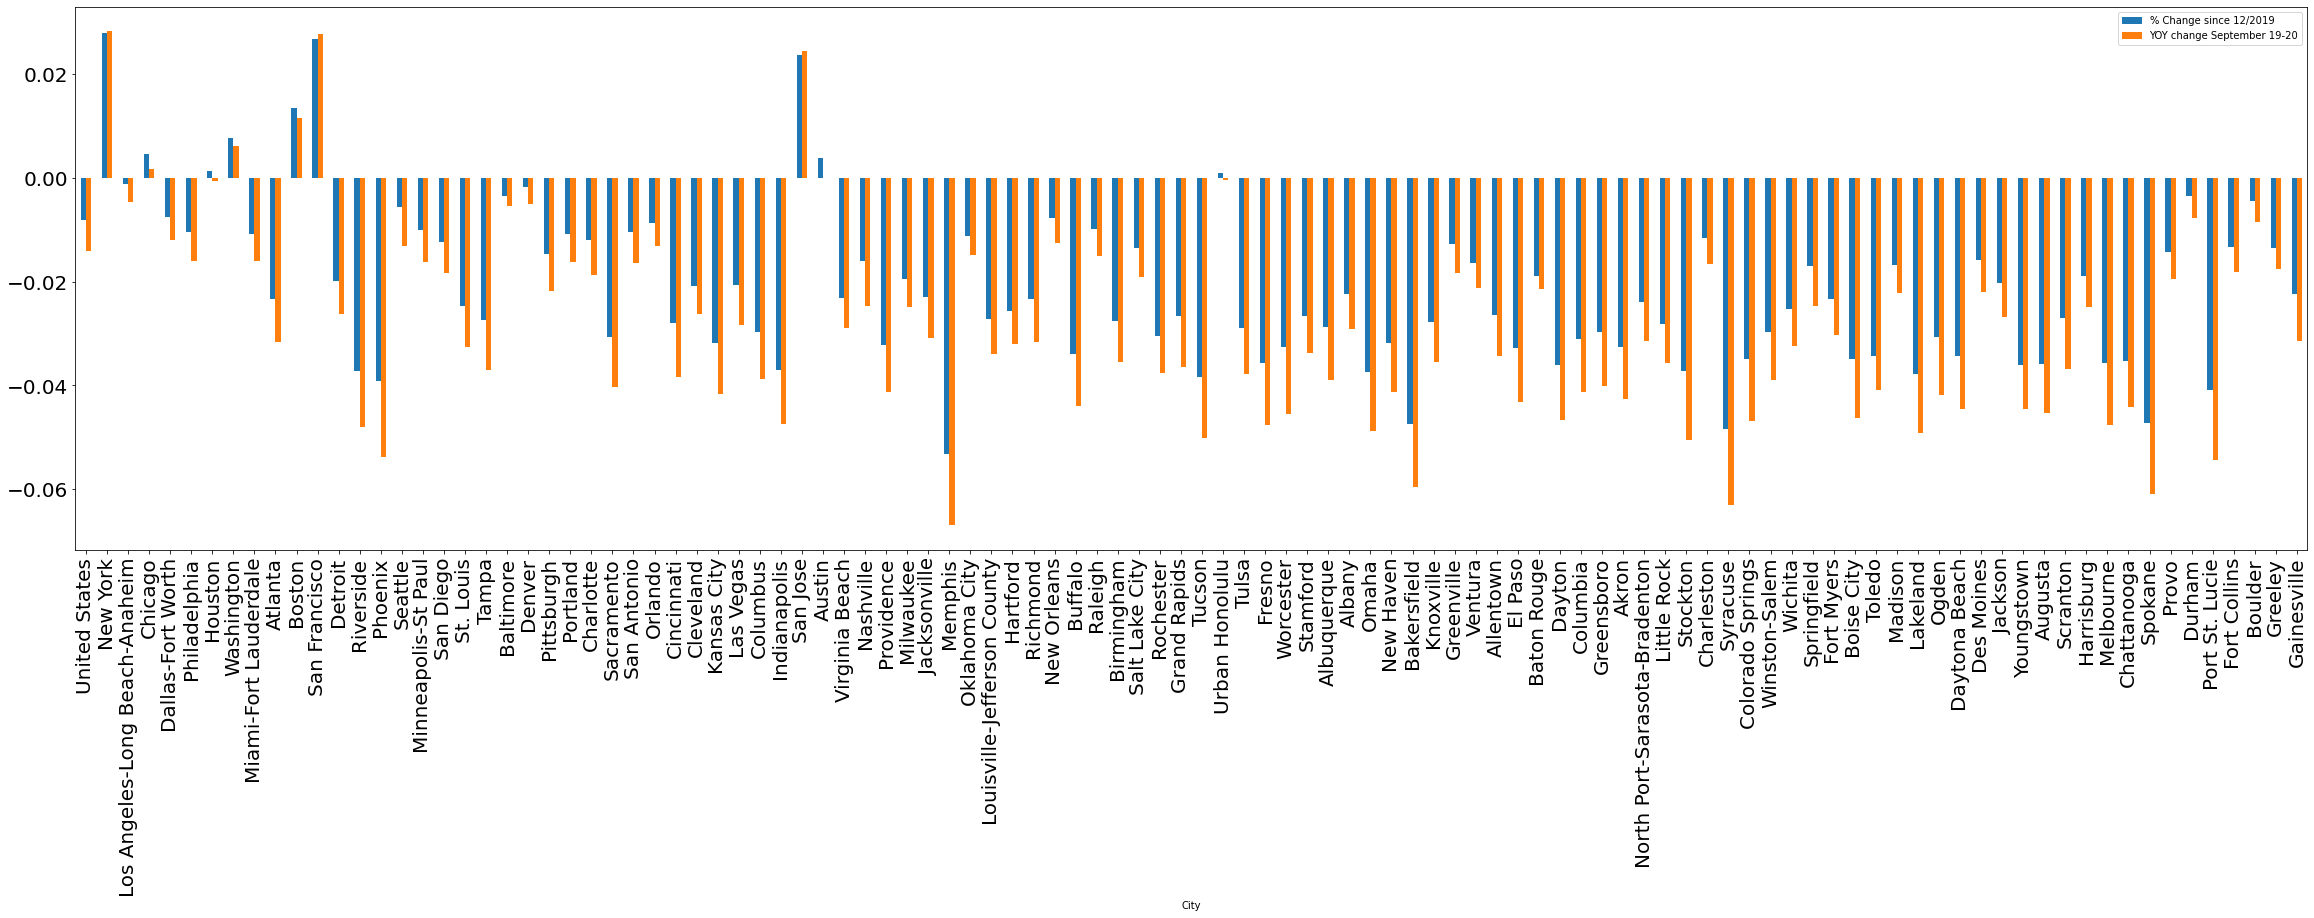

In [21]:
corona_impact_df.plot(kind='bar',figsize=(40,10),fontsize=(20))